In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Jacobi_1D(sol):
    Niter, Nx = sol.shape
    for iter in range(1,Niter,1):
        for j in range(1,Nx-1,1):
            sol[iter,j] = 0.5*(sol[iter-1,j+1] + sol[iter-1,j-1])
    return sol

In [3]:
def Gauss_Seidel_1D(sol):
    Niter, Nx = sol.shape
    for iter in range(1,Niter,1):
        for j in range(1,Nx-1,1):
            sol[iter,j] = 0.5*(sol[iter-1,j+1] + sol[iter,j-1])
    return sol

In [4]:
def Red_Black_Gauss_Seidel_1D(sol):
    Niter, Nx = sol.shape
    for iter in range(1,Niter,1):
        for j in range(1,Nx-1,2):
            sol[iter,j] = 0.5*(sol[iter-1,j+1] + sol[iter-1,j-1])
        for j in range(2,len(x)-1,2):
            sol[iter,j] = 0.5*(sol[iter,j+1] + sol[iter,j-1])
    return sol

In [5]:
Nx       = 100
xmax     = 10
xmin     = 0
x        = np.linspace(0,xmax-xmin,Nx)
Niter    = 50
sol      = np.zeros((Niter,len(x)))
sol_9    = np.zeros((Niter,len(x)))
sol[0,:] = np.sin(3*np.pi*x/(xmax-xmin))
sol_9[0,:] = np.sin(9*np.pi*x/(xmax-xmin))
sol_GS      = np.zeros((Niter,len(x)))
sol_9_GS    = np.zeros((Niter,len(x)))
sol_GS[0,:] = np.sin(3*np.pi*x/(xmax-xmin))
sol_9_GS[0,:] = np.sin(9*np.pi*x/(xmax-xmin))
sol_RB_GS      = np.zeros((Niter,len(x)))
sol_9_RB_GS    = np.zeros((Niter,len(x)))
sol_RB_GS[0,:] = np.sin(3*np.pi*x/(xmax-xmin))
sol_9_RB_GS[0,:] = np.sin(9*np.pi*x/(xmax-xmin))

In [6]:
sol      = Jacobi_1D(sol)
sol_9    = Jacobi_1D(sol_9)
sol_GS   = Gauss_Seidel_1D(sol_GS)
sol_9_GS = Gauss_Seidel_1D(sol_9_GS)
sol_RB_GS   = Red_Black_Gauss_Seidel_1D(sol_RB_GS)
sol_9_RB_GS = Red_Black_Gauss_Seidel_1D(sol_9_RB_GS)

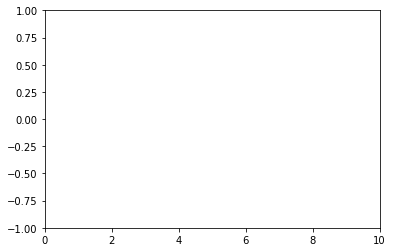

In [7]:
import matplotlib.animation as animation
from IPython import display

# initializing a figure
fig = plt.figure()
# labeling the x-axis and y-axis
axis = plt.axes(xlim=(0, 10),  ylim=(-1.0, 1.0))
  
# initializing a line variable
line, = axis.plot([], [], lw=3)
line1, = axis.plot([], [], lw=3)

In [8]:
def animate(frame_number):
    line.set_data(x, sol[frame_number,:])
    line.set_color('green')
    line1.set_data(x, sol_9[frame_number,:])
    line1.set_color('blue')
    return line,line1

In [9]:
def animate_GS(frame_number):
    line.set_data(x, sol_GS[frame_number,:])
    line.set_color('green')
    line1.set_data(x, sol_9_GS[frame_number,:])
    line1.set_color('blue')
    return line,line1

In [10]:
def animate_RB_GS(frame_number):
    line.set_data(x, sol_RB_GS[frame_number,:])
    line.set_color('green')
    line1.set_data(x, sol_9_RB_GS[frame_number,:])
    line1.set_color('blue')
    return line,line1

In [11]:
anim = animation.FuncAnimation(fig, animate, frames=Niter, 
                               interval=20, blit=True)
fig.suptitle('Jacobi_iteration', fontsize=14)

Text(0.5, 0.98, 'Jacobi_iteration')

In [12]:
#anim_GS = animation.FuncAnimation(fig1, animate_GS, frames=Niter, interval=20, blit=True)
#fig.suptitle('Gauss_Seidel_iteration', fontsize=14)

In [13]:
# converting to an html5 vide
video    = anim.to_html5_video()
#video_GS = anim_GS.to_html5_video()
# embedding for the video
html    = display.HTML(video)
#html_GS = display.HTML(video_GS)
# draw the animation
display.display(html)
#display.display(html_GS)
plt.close()

In [14]:
anim = animation.FuncAnimation(fig, animate_GS, frames=Niter, 
                               interval=20, blit=True)
fig.suptitle('Gauss_Seidel_iteration', fontsize=14)

Text(0.5, 0.98, 'Gauss_Seidel_iteration')

In [15]:
# converting to an html5 vide
video    = anim.to_html5_video()
#video_GS = anim_GS.to_html5_video()
# embedding for the video
html    = display.HTML(video)
#html_GS = display.HTML(video_GS)
# draw the animation
display.display(html)
#display.display(html_GS)
plt.close()

In [16]:
anim = animation.FuncAnimation(fig, animate_RB_GS, frames=Niter, 
                               interval=20, blit=True)
fig.suptitle('RB_Gauss_Seidel_iteration', fontsize=14)

Text(0.5, 0.98, 'RB_Gauss_Seidel_iteration')

In [17]:
# converting to an html5 vide
video    = anim.to_html5_video()
#video_GS = anim_GS.to_html5_video()
# embedding for the video
html    = display.HTML(video)
#html_GS = display.HTML(video_GS)
# draw the animation
display.display(html)
#display.display(html_GS)
plt.close()

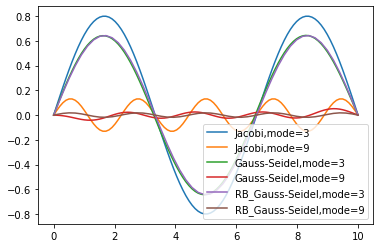

In [19]:
plt.plot(x,sol[-1,:],label='Jacobi,mode=3')
plt.plot(x,sol_9[-1,:],label='Jacobi,mode=9')
plt.plot(x,sol_GS[-1,:],label='Gauss-Seidel,mode=3')
plt.plot(x,sol_9_GS[-1,:],label='Gauss-Seidel,mode=9')
plt.plot(x,sol_RB_GS[-1,:],label='RB_Gauss-Seidel,mode=3')
plt.plot(x,sol_9_RB_GS[-1,:],label='RB_Gauss-Seidel,mode=9')
plt.legend(loc='best')
plt.show()